<a href="https://colab.research.google.com/github/RodolfoFerro/cimps20/blob/main/notebooks/03-Redes_neuronales_profundas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales profundas

> **Rodolfo Ferro** <br>
> Google Dev Expert en ML, 2020.
>
> _Redes:_
> - GitHub - [RodolfoFerro](https://github.com/RodolfoFerro)
> - Twitter - [@FerroRodolfo](https://twitter.com/FerroRodolfo)
> - Instagram - [@rodo_ferro](https://instagram.com/rodo_ferro)

## Contenidos

#### **Sección IV**
1. **Código:** El dataset de modas
2. **Código:** Preparación de datos
3. **Código:** Creación del modelo
4. **Código:** Entrenamiento del modelo
5. **Código:** Evaluación del modelo
6. **Código:** Predicción


## **Sección IV**

### El dataset de modas

Comencemos importando TensorFlow.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [3]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 9
Matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 2

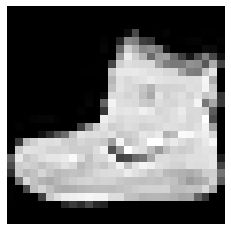

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 0

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

### Preparación de los datos

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **normalización**.

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

### Creación del modelo



In [8]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(), 
            tf.keras.layers.Dense(128, activation=tf.nn.relu), 
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

### Entrenamiento del modelo

In [9]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4983 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3367 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8913


### Evaluación del modelo

In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3791 - accuracy: 0.8617


[0.37912458181381226, 0.8616999983787537]

### Predicción


Label: 9
Prediction: 9


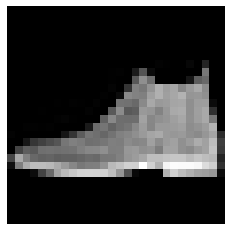

In [20]:
test_index = 0

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print("Label:", test_labels[test_index])
prediction = model.predict(np.expand_dims(test_images[test_index], axis=-1))
print("Prediction:", np.argmax(prediction))